<a href="https://colab.research.google.com/github/ARYAN-1002/Banco-de-Portugal-ML-Model/blob/main/Banco_de_Portugal_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
from google.colab import files  # Only for Google Colab

def convert_unstructured_to_structured(input_file, output_file='structured_file.csv'):

    # Step 1: Read the unstructured CSV file
    unstructured_data = []
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            unstructured_data.append(row)

    # Step 2: Process and structure the data
    # Assuming unstructured data has a pattern you want to structure into rows and columns.
    # Below is a simple example where every two rows in the unstructured file are treated as a single structured row.

    structured_data = []

    # Example: If every 2 lines should be grouped together
    for i in range(0, len(unstructured_data), 2):
        try:
            structured_row = unstructured_data[i] + unstructured_data[i+1]
            structured_data.append(structured_row)
        except IndexError:
            pass  # In case of uneven row count, skip the last row

    # Step 3: Convert the structured data into a DataFrame
    structured_df = pd.DataFrame(structured_data)

    # Step 4: Save the structured data to a new CSV file
    structured_df.to_csv(output_file, index=False)

    print(f"Structured CSV file '{output_file}' created successfully.")

    # Step 5: Download the CSV file to local (for Google Colab environments)
    files.download(output_file)

# Usage in Jupyter Notebook or Google Colab
if __name__ == "__main__":
    # Specify the unstructured CSV file name or path
    unstructured_file = '/content/bank-full.csv'  # Replace with your file path

    # Call the function to structure the CSV and download it
    convert_unstructured_to_structured(unstructured_file)


FileNotFoundError: [Errno 2] No such file or directory: '/content/bank-full.csv'

Columns in the dataset: Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')
Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:51:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8945564351587366
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10861
           1       0.57      0.30      0.39      1392

    accuracy                           0.89     12253
   macro avg       0.74      0.63      0.67     12253
weighted avg       0.88      0.89      0.88     12253



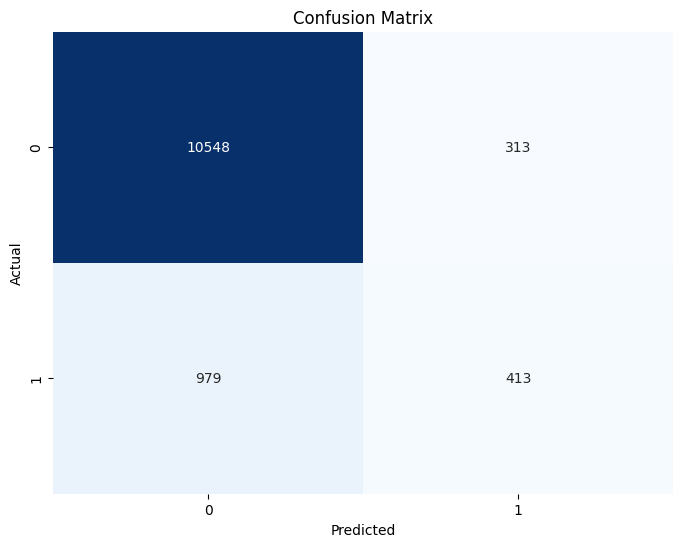

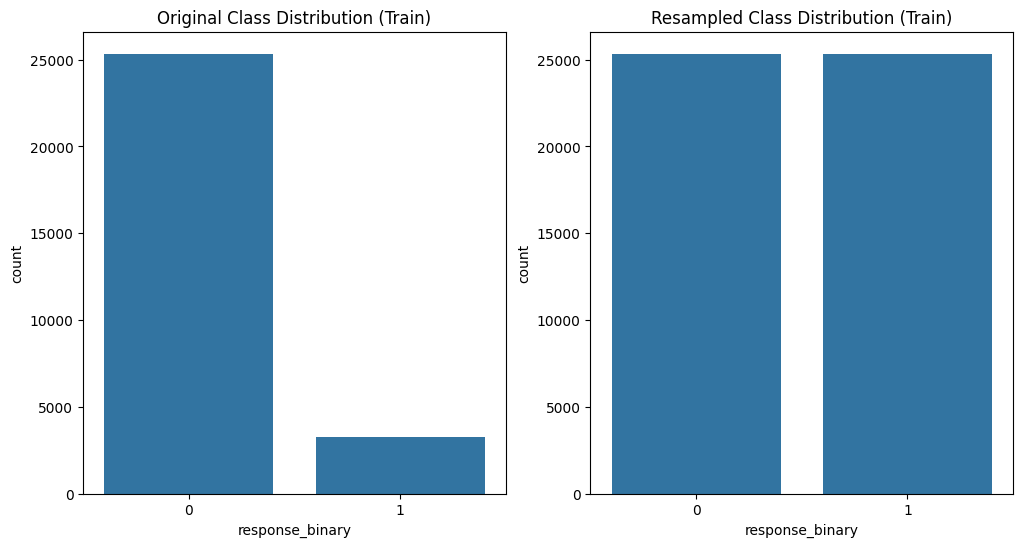

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank_cleaned.csv'  # Path to the uploaded dataset
data = pd.read_csv(file_path)

# Check available columns and data types
print("Columns in the dataset:", data.columns)
print(data.dtypes)

# Data Preprocessing
data.drop('duration', axis=1, inplace=True)  # Dropping the 'duration' column

# Create a contact frequency feature
data['contact_frequency'] = data['campaign'] / (data['age'] + 1)

# Prepare features and target
X = data.drop(['response', 'response_binary', 'Unnamed: 0'], axis=1)  # Dropping irrelevant columns
y = data['response_binary']  # Assuming you want to predict the binary response

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy/indicator variables

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handling class imbalance using SMOTE and RandomUnderSampler
resampling = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

# Apply resampling to the training set
X_resampled, y_resampled = resampling.fit_resample(X_train, y_train)

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the class distribution in the original and resampled datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Original Class Distribution (Train)')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution (Train)')
plt.show()


In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'response_binary',
       'contact_frequency'],
      dtype='object')


Class distribution before resampling:
response_binary
0    36202
1     4639
Name: count, dtype: int64
Class distribution after resampling:
response_binary
0    25341
1    25341
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8373459560923855
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10861
           1       0.33      0.44      0.38      1392

    accuracy                           0.84     12253
   macro avg       0.63      0.66      0.64     12253
weighted avg       0.86      0.84      0.85     12253



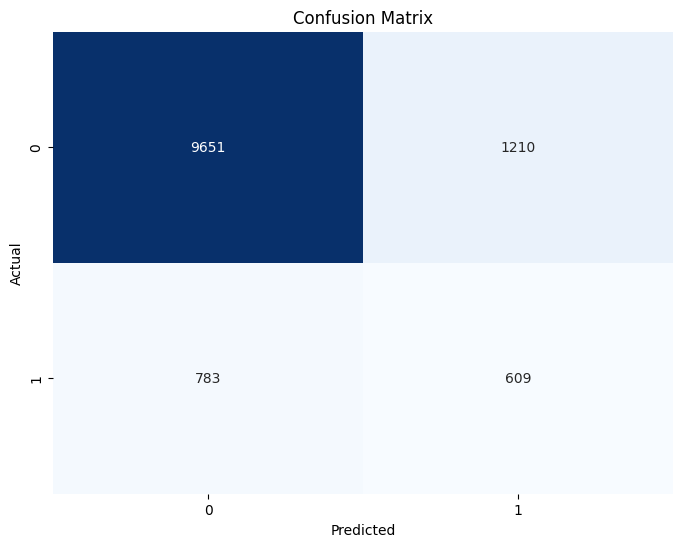

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank_cleaned.csv'
data = pd.read_csv(file_path)

# Data Preprocessing
data = data.drop(['Unnamed: 0', 'duration'], axis=1)

# Encode the response variable
le_response = LabelEncoder()
data['response_binary'] = le_response.fit_transform(data['response'])

# Prepare features and target
X = data.drop(['response', 'response_binary'], axis=1)
y = data['response_binary']

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Check class distribution
print("Class distribution before resampling:")
print(y.value_counts())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/bank_cleaned.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Select the response column
response_column = data['response']

# Display the first few rows of the response column
print(response_column.head())


0    no
1    no
2    no
3    no
4    no
Name: response, dtype: object


In [ ]:
# Calculate the number of 'yes' and 'no' in the response column
response_counts = data['response'].value_counts()

# Display the counts
print("Counts of response:")
print(response_counts)


Counts of response:
response
no     36202
yes     4639
Name: count, dtype: int64


0    no
1    no
2    no
3    no
4    no
Name: response, dtype: object
Counts of response:
response
no     36202
yes     4639
Name: count, dtype: int64
Class distribution after resampling:
response_binary
0    25341
1    25341
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9111238064147555
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10861
           1       0.60      0.64      0.62      1392

    accuracy                           0.91     12253
   macro avg       0.78      0.79      0.79     12253
weighted avg       0.91      0.91      0.91     12253



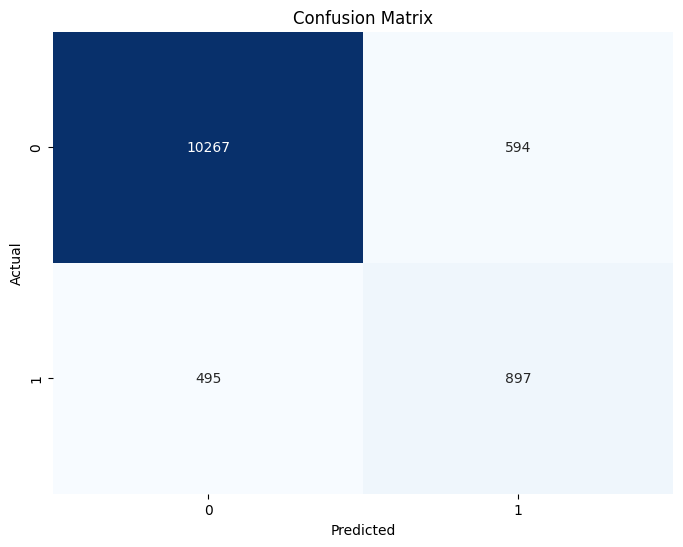

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/bank_cleaned.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Select the response column
response_column = data['response']

# Display the first few rows of the response column
print(response_column.head())

# Calculate the number of 'yes' and 'no' in the response column
response_counts = data['response'].value_counts()
print("Counts of response:")
print(response_counts)

# Encode the response column
le = LabelEncoder()
data['response_binary'] = le.fit_transform(data['response'])

# Prepare features and target variable
X = data.drop(['response', 'response_binary'], axis=1)
y = data['response_binary']

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

# Create and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
